# Task 9 — Business Insights & Executive Report for Olist

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (12,6)
sns.set_style("whitegrid")

# Loading the data

In [2]:
orders = pd.read_csv(r"C:\Users\j\Desktop\Elevvo Internship Program\Tasks\Task 9 Business Insights & Executive Report for\data\olist_orders_dataset.csv", parse_dates=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])
items = pd.read_csv(r"C:\Users\j\Desktop\Elevvo Internship Program\Tasks\Task 9 Business Insights & Executive Report for\data\olist_order_items_dataset.csv", parse_dates=['shipping_limit_date'])
payments = pd.read_csv(r"C:\Users\j\Desktop\Elevvo Internship Program\Tasks\Task 9 Business Insights & Executive Report for\data\olist_order_payments_dataset.csv")

print("orders:", orders.shape)
print("items:", items.shape)
print("payments:", payments.shape)
display(orders.head())
display(items.head())
display(payments.head())

orders: (99441, 8)
items: (112650, 7)
payments: (103886, 5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Quick info & missing values

In [3]:
print("Orders dtypes and nulls:")
display(orders.info())
display(orders.isna().sum().sort_values(ascending=False).head(20))

print("\nItems nulls:")
display(items.isna().sum().sort_values(ascending=False).head(20))

print("\nPayments nulls:")
display(payments.isna().sum().sort_values(ascending=False).head(20))


Orders dtypes and nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


None

order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
order_purchase_timestamp            0
order_status                        0
customer_id                         0
order_estimated_delivery_date       0
dtype: int64


Items nulls:


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Payments nulls:


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Quick dtype + missing-value summary

In [4]:
display(orders.dtypes)
display(orders.isna().sum().sort_values(ascending=False))
display(items.isna().sum())
display(payments.isna().sum())

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
order_purchase_timestamp            0
order_status                        0
customer_id                         0
order_estimated_delivery_date       0
dtype: int64

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Normalise column names & ensure numeric types for item/payment amounts

In [5]:
orders.columns = orders.columns.str.lower()
items.columns = items.columns.str.lower()
payments.columns = payments.columns.str.lower()

items['price'] = pd.to_numeric(items['price'], errors='coerce')
items['freight_value'] = pd.to_numeric(items['freight_value'], errors='coerce')
payments['payment_value'] = pd.to_numeric(payments['payment_value'], errors='coerce')


In [6]:
# CELL 5 - Feature engineering on orders, careful with NaN dates
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()
orders['order_year'] = orders['order_purchase_timestamp'].dt.year

In [7]:
# Delivery lead-time: if delivered date exists compute difference else NaN
orders['delivery_time_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

In [8]:
# Flag delivered (true if order_status == 'delivered' AND delivered date present)
orders['is_delivered'] = ((orders['order_status']=='delivered') & (orders['order_delivered_customer_date'].notna()))

In [9]:
# Quick check
display(orders[['order_id','order_status','order_purchase_timestamp','order_delivered_customer_date','delivery_time_days','is_delivered']].head())

,order_id,order_status,order_purchase_timestamp,order_delivered_customer_date,delivery_time_days,is_delivered
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,8.0,True
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,13.0,True
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,9.0,True
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,13.0,True
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2.0,True


Aggregate items and payments to order-level and merge safely

In [10]:
order_items_agg = items.groupby('order_id').agg(
    order_total_price=('price','sum'),
    total_items=('order_item_id','count'),
    avg_item_price=('price','mean'),
    total_freight=('freight_value','sum')
).reset_index()

order_payments_agg = payments.groupby('order_id').agg(
    payments_total=('payment_value','sum'),
    num_payments=('payment_installments','count'),
    payment_methods=('payment_type', lambda x: ','.join(sorted(x.unique())))
).reset_index()

orders_agg = orders.merge(order_items_agg, on='order_id', how='left').merge(order_payments_agg, on='order_id', how='left')

# Resolve the missing

# - If payments_total missing
# prefer order_total_price where available
# else 0
orders_agg['payments_total'] = orders_agg['payments_total'].fillna(orders_agg['order_total_price']).fillna(0)
orders_agg['order_total_price'] = orders_agg['order_total_price'].fillna(orders_agg['payments_total']).fillna(0)
orders_agg['total_items'] = orders_agg['total_items'].fillna(0).astype(int)
orders_agg['avg_item_price'] = orders_agg['avg_item_price'].fillna(0)
orders_agg['total_freight'] = orders_agg['total_freight'].fillna(0)

display(orders_agg[['order_id','order_status','order_total_price','payments_total','total_items']].sample(5))


,order_id,order_status,order_total_price,payments_total,total_items
64480,c2dd16198fe0f15a071dc1cefbd4557c,delivered,28.9,55.79,1
18377,861d85972797c770a5139774b13efc48,delivered,40.0,55.10,1
11605,15565b9ff1ef637e3216ebf24bb05c31,delivered,165.0,249.57,1
69912,fe575916daa713f9830a8b7362121621,delivered,86.9,103.19,1
78827,203763b580fdf4ab6596f692370d27a7,delivered,70.0,86.25,1


KPI calculations (restrict revenue to delivered orders where appropriate)

In [11]:
delivered = orders_agg[orders_agg['is_delivered']].copy()

total_revenue = delivered['order_total_price'].sum()
num_orders = delivered['order_id'].nunique()
num_customers = delivered['customer_id'].nunique()
aov = delivered['order_total_price'].mean()
median_ov = delivered['order_total_price'].median()

print(f"Dataset period: {orders['order_purchase_timestamp'].min().date()} -> {orders['order_purchase_timestamp'].max().date()}")
print(f"Total delivered revenue: {total_revenue:,.2f}")
print(f"Delivered orders: {num_orders:,}")
print(f"Unique customers (delivered): {num_customers:,}")
print(f"Average Order Value (AOV): {aov:,.2f}")
print(f"Median Order Value: {median_ov:,.2f}")


Dataset period: 2016-09-04 -> 2018-10-17
Total delivered revenue: 13,220,248.93
Delivered orders: 96,470
Unique customers (delivered): 96,470
Average Order Value (AOV): 137.04
Median Order Value: 86.50


Monthly trends (delivered orders)

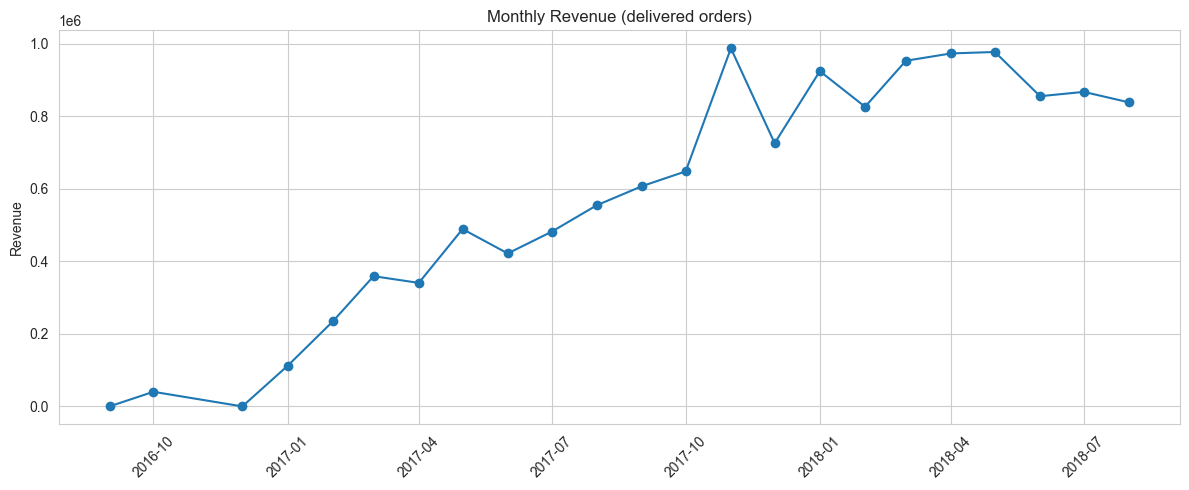

,order_month,revenue,orders,aov
0,2016-09-01,134.97,1,134.970000
1,2016-10-01,40325.11,265,152.170226
2,2016-12-01,10.90,1,10.900000
3,2017-01-01,111798.36,750,149.064480
4,2017-02-01,234223.40,1653,141.695947


In [12]:
monthly = delivered.groupby('order_month').agg(
    revenue=('order_total_price','sum'),
    orders=('order_id','nunique'),
    aov=('order_total_price','mean')
).reset_index()

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(monthly['order_month'], monthly['revenue'], marker='o')
ax.set_title('Monthly Revenue (delivered orders)')
ax.set_ylabel('Revenue')
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

display(monthly.head())


Cancellation / order status analysis (include orders with non-delivered statuses)

In [13]:
status_counts = orders_agg['order_status'].value_counts()
status_pct = orders_agg['order_status'].value_counts(normalize=True) * 100
print("Order status counts:\n", status_counts)
print("\nOrder status %:\n", status_pct.round(2))

# Cancellation rate
cancelled = orders_agg[orders_agg['order_status']=='cancelled'].shape[0]
total_orders = orders_agg.shape[0]
print(f"\nCancellation rate: {cancelled}/{total_orders} = {cancelled/total_orders:.2%}")


Order status counts:
 order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Order status %:
 order_status
delivered      97.02
shipped         1.11
canceled        0.63
unavailable     0.61
invoiced        0.32
processing      0.30
created         0.01
approved        0.00
Name: proportion, dtype: float64

Cancellation rate: 0/99441 = 0.00%


Price distribution

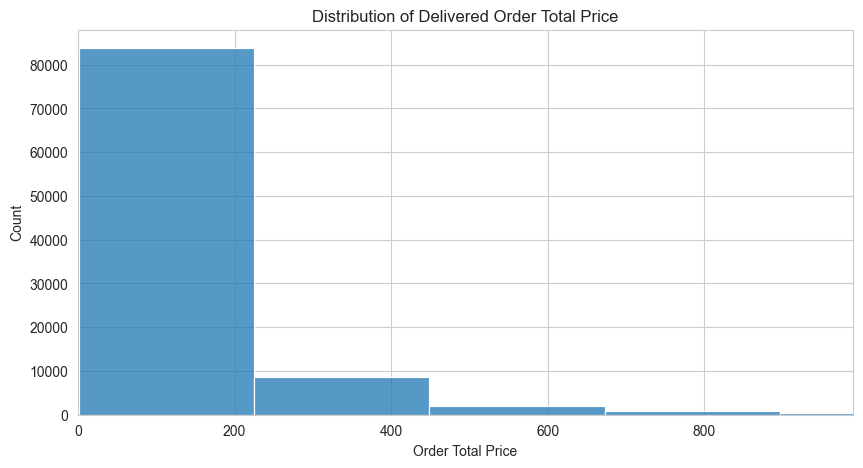

99th percentile order value: 990.0


In [14]:
plt.figure(figsize=(10,5))
sns.histplot(delivered['order_total_price'].clip(lower=0), bins=60, kde=False)
plt.title('Distribution of Delivered Order Total Price')
plt.xlabel('Order Total Price')
plt.xlim(0, delivered['order_total_price'].quantile(0.99))
plt.show()

print("99th percentile order value:", delivered['order_total_price'].quantile(0.99))


# RFM ANALYSIS

In [26]:
# Some orders may have multiple payment rows (installments); sum them.
payments_agg = payments.groupby('order_id', as_index=False)['payment_value'].sum().rename(columns={'payment_value':'order_payment_total'})

# Merge into orders to get per-order money + customer + timestamp
orders_pay = orders[['order_id','customer_id','order_purchase_timestamp']].merge(payments_agg, on='order_id', how='left')

# If any orders have no payments (unlikely), fill with 0
orders_pay['order_payment_total'] = orders_pay['order_payment_total'].fillna(0.0)

# Quick sample check
orders_pay.head()

,order_id,customer_id,order_purchase_timestamp,order_payment_total
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,28.62


In [27]:
# Reference snapshot date = day after last purchase in dataset
snapshot_date = orders_pay['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Group by customer
rfm = orders_pay.groupby('customer_id').agg(
    last_purchase = ('order_purchase_timestamp', 'max'),
    frequency = ('order_id', 'nunique'),
    monetary = ('order_payment_total', 'sum')
).reset_index()

# Recency in days (lower = better)
rfm['recency'] = (snapshot_date - rfm['last_purchase']).dt.days

# Ensure numeric types, fill any tiny NaNs defensively
rfm['frequency'] = rfm['frequency'].astype(int)
rfm['monetary'] = pd.to_numeric(rfm['monetary'], errors='coerce').fillna(0.0)

# Drop intermediate column
rfm = rfm[['customer_id','recency','frequency','monetary']]

# Quick stats
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,99441.0,290.900192,153.667316,1.0,167.00,272.00,401.00,773.00
frequency,99441.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.00
monetary,99441.0,160.988648,221.950728,0.0,62.01,105.29,176.97,13664.08


In [ ]:
#score R, F, M using percentile ranks
# We'll compute percentile ranks and map to 1..5 scores (5 best)

# Recency: lower is better --> invert percentile
rfm['r_pct'] = rfm['recency'].rank(method='max', pct=True)
rfm['r_score'] = pd.cut(1 - rfm['r_pct'],
                        bins=[-1e-9, 0.2, 0.4, 0.6, 0.8, 1.0],
                        labels=[1,2,3,4,5],
                        include_lowest=True).astype(int)

# Frequency: higher is better
rfm['f_pct'] = rfm['frequency'].rank(method='max', pct=True)
rfm['f_score'] = pd.cut(rfm['f_pct'],
                        bins=[-1e-9, 0.2, 0.4, 0.6, 0.8, 1.0],
                        labels=[1,2,3,4,5],
                        include_lowest=True).astype(int)

# Monetary: higher is better
rfm['m_pct'] = rfm['monetary'].rank(method='max', pct=True)
rfm['m_score'] = pd.cut(rfm['m_pct'],
                        bins=[-1e-9, 0.2, 0.4, 0.6, 0.8, 1.0],
                        labels=[1,2,3,4,5],
                        include_lowest=True).astype(int)

# RFM combined score (sum) and string code
rfm['rfm_score_sum'] = rfm['r_score'] + rfm['f_score'] + rfm['m_score']
rfm['rfm_code'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)

# Keep only useful cols for next steps
rfm = rfm[['customer_id','recency','frequency','monetary','r_score','f_score','m_score','rfm_score_sum','rfm_code']]

# Show distribution of scores
rfm[['r_score','f_score','m_score']].agg(['value_counts']).T.head(10)


,,2,3,1,5,4
r_score,value_counts,20055.0,19928.0,19907.0,19798.0,19753.0
f_score,value_counts,NaN,NaN,NaN,99441.0,NaN
m_score,value_counts,19890.0,19888.0,19886.0,19897.0,19880.0


In [29]:
#map numeric sum to human segments (adjust thresholds as you prefer)
def rfm_segment_label(total):
    if total >= 13:      # 13-15
        return 'Champions'
    elif total >= 10:    # 10-12
        return 'Loyal Customers'
    elif total >= 7:     # 7-9
        return 'Potential Loyalist'
    elif total >= 5:     # 5-6
        return 'Needs Attention'
    else:                # 3-4
        return 'At Risk'

rfm['segment'] = rfm['rfm_score_sum'].apply(rfm_segment_label)

# Summary counts & average metrics per segment
seg_summary = rfm.groupby('segment').agg(
    customers = ('customer_id','count'),
    avg_recency = ('recency','mean'),
    avg_frequency = ('frequency','mean'),
    avg_monetary = ('monetary','mean')
).sort_values('customers', ascending=False).reset_index()

display(seg_summary)


,segment,customers,avg_recency,avg_frequency,avg_monetary
0,Loyal Customers,50866,287.466363,1.0,152.330976
1,Potential Loyalist,24512,431.105785,1.0,60.328395
2,Champions,24063,155.337115,1.0,281.828328


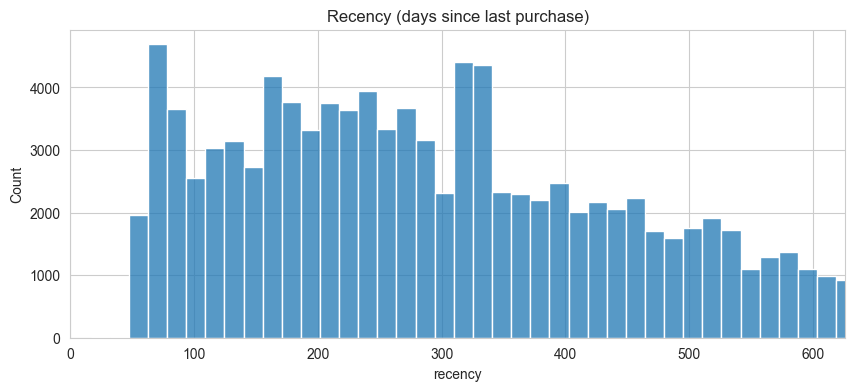

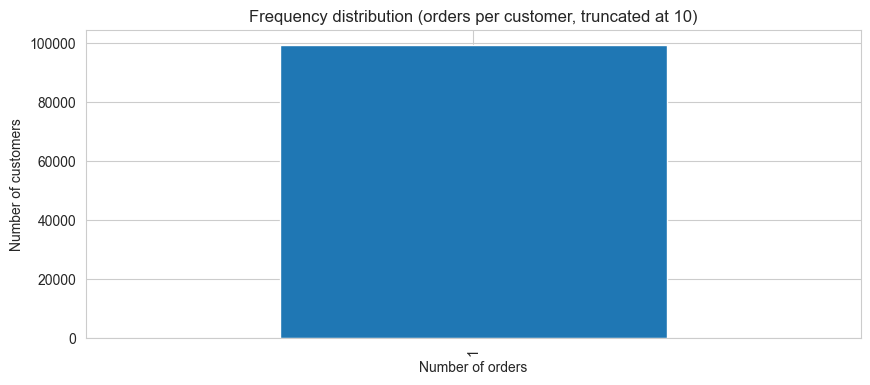

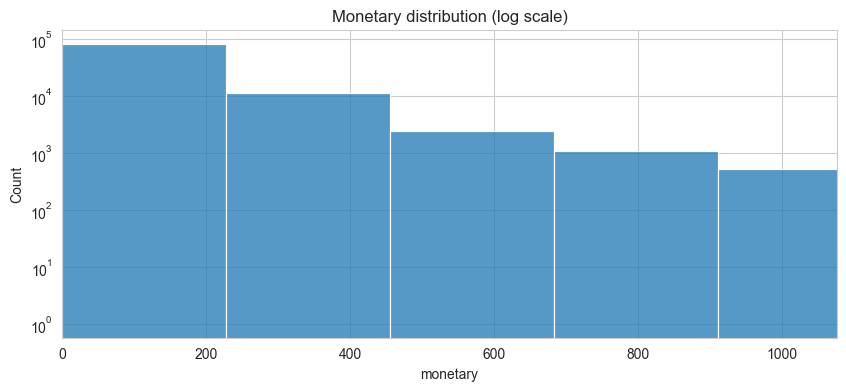

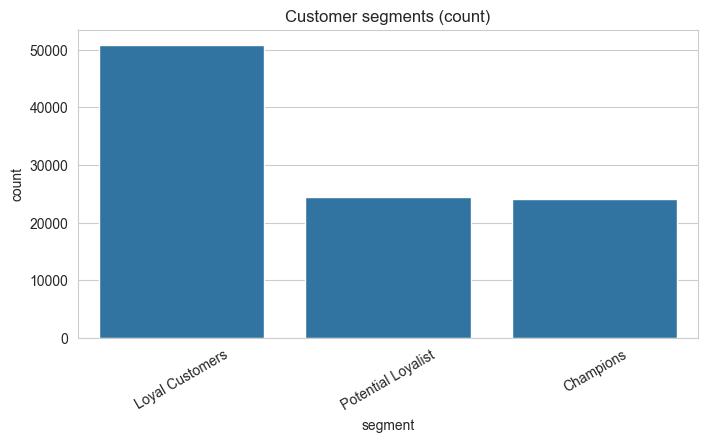

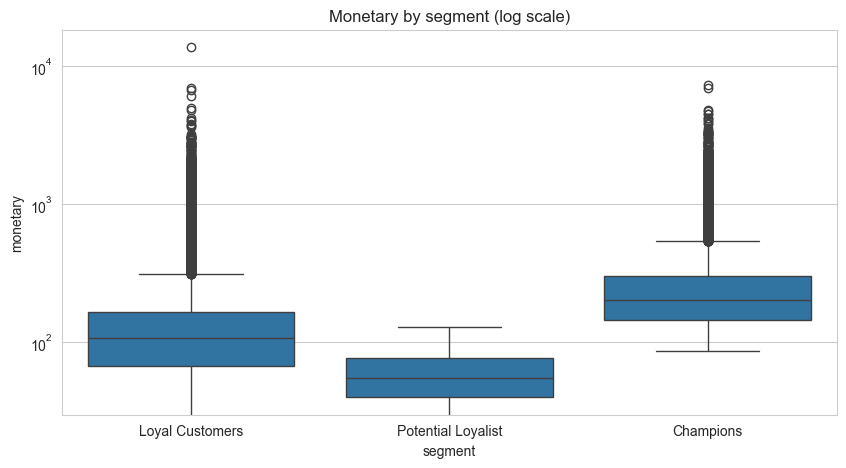

In [30]:
# plots — Recency, Frequency, Monetary distributions + segment plots

# 1) Recency histogram
plt.figure(figsize=(10,4))
sns.histplot(rfm['recency'], bins=50, kde=False)
plt.title('Recency (days since last purchase)')
plt.xlim(0, rfm['recency'].quantile(0.99))
plt.show()

# 2) Frequency distribution (show up to freq=10 then tail)
plt.figure(figsize=(10,4))
freq_counts = rfm['frequency'].value_counts().sort_index()
# plot truncated view
freq_counts[freq_counts.index <= 10].plot(kind='bar')
plt.title('Frequency distribution (orders per customer, truncated at 10)')
plt.xlabel('Number of orders')
plt.ylabel('Number of customers')
plt.show()

# 3) Monetary distribution (log-scale to handle skew)
plt.figure(figsize=(10,4))
sns.histplot(rfm['monetary'].clip(lower=0), bins=60, kde=False)
plt.yscale('log')
plt.title('Monetary distribution (log scale)')
plt.xlim(0, rfm['monetary'].quantile(0.99))
plt.show()

# 4) Segment counts
plt.figure(figsize=(8,4))
order = seg_summary.sort_values('customers', ascending=False)['segment']
sns.countplot(x='segment', data=rfm, order=order)
plt.title('Customer segments (count)')
plt.xticks(rotation=30)
plt.show()

# 5) Monetary by segment (boxplot)
plt.figure(figsize=(10,5))
sns.boxplot(x='segment', y='monetary', data=rfm, order=order)
plt.yscale('log')
plt.title('Monetary by segment (log scale)')
plt.show()


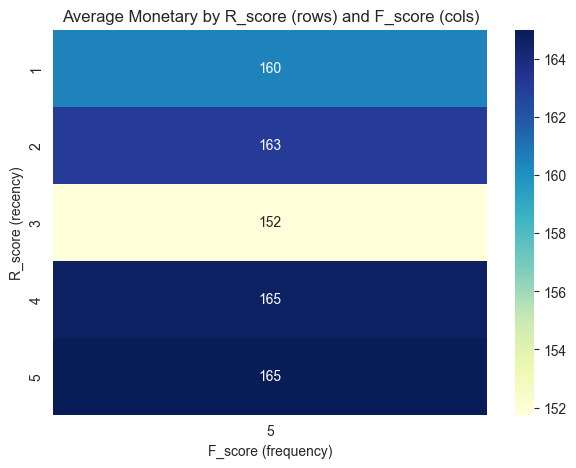

In [31]:
# R x F heatmap (average monetary) to identify valuable combos
pivot = rfm.pivot_table(index='r_score', columns='f_score', values='monetary', aggfunc='mean')
# sort index/columns ascending so 1..5 appear in natural order
pivot = pivot.sort_index().reindex(sorted(pivot.columns), axis=1)

plt.figure(figsize=(7,5))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Monetary by R_score (rows) and F_score (cols)')
plt.xlabel('F_score (frequency)')
plt.ylabel('R_score (recency)')
plt.show()


In [32]:
# Top 20 customers by monetary
top_customers = rfm.sort_values('monetary', ascending=False).head(20)
display(top_customers)

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score_sum,rfm_code,segment
8546,1617b1357756262bfa56ab541c47bc16,384,1,13664.08,2,5,5,12,255,Loyal Customers
91985,ec5b2ba62e574342386871631fafd3fc,95,1,7274.88,5,5,5,15,555,Champions
77522,c6e2731c5b391845f6800c97401a43a9,612,1,6929.31,1,5,5,11,155,Loyal Customers
95124,f48d464a0baaea338cb25f816991ab1f,84,1,6922.21,5,5,5,15,555,Champions
24771,3fd6777bbce08a352fddd04e4a7cc8f6,511,1,6726.66,1,5,5,11,155,Loyal Customers
2065,05455dfa7cd02f13d132aa7a6a9729c6,328,1,6081.54,2,5,5,12,255,Loyal Customers
86908,df55c14d1476a9a3467f131269c2477f,565,1,4950.34,1,5,5,11,155,Loyal Customers
87397,e0a2412720e9ea4f26c1ac985f6a7358,98,1,4809.44,5,5,5,15,555,Champions
14282,24bbf5fd2f2e1b359ee7de94defc4a15,547,1,4764.34,1,5,5,11,155,Loyal Customers
23932,3d979689f636322c62418b6346b1c6d2,118,1,4681.78,5,5,5,15,555,Champions


# Overview

- The Recency distribution shows that a large proportion of customers have not purchased recently, indicating a drop-off in engagement.

- Frequency is highly skewed: most customers buy only once, with very few repeat buyers.

- Monetary value follows a similar skew, with a small group of high-value customers driving the majority of revenue.

- RFM segmentation highlights clear customer groups:

Champions: recent, frequent, and high-spending buyers – the most valuable customers.

Loyal Customers: purchase frequently, but not always the highest spenders.

At Risk: previously valuable but inactive in recent months.

Hibernating/Churned: long inactive, low-spending, one-time buyers.

- The heatmap analysis shows that recency and frequency strongly correlate with monetary value, confirming that repeat and recent buyers are revenue drivers.

# Manager Recommendations

- Retention is critical:
Since most customers only buy once, the business should invest in follow-up campaigns (emails, discounts after first order) to increase second-purchase conversion.

- Prioritise Champions:
Although few, Champions drive a significant share of revenue. Exclusive benefits (priority support, limited offers) will help maintain their loyalty.

- Re-engage At-Risk Customers:
Customers who previously bought multiple times but have gone inactive should be targeted with personalised reactivation campaigns, as their past behaviour suggests strong potential value.

- Grow Loyal Segment:
Customers who buy steadily, but not at high value, can be encouraged to spend more via cross-selling (“Frequently bought together”) and bundling.

- Address High Churn Rate:
The dominance of one-time buyers suggests friction in the customer experience or lack of incentives to return. Improve post-purchase engagement and consider loyalty rewards to reduce churn.

- Revenue Concentration Risk:
Since a small group of high-value customers contributes most revenue, losing them would significantly impact sales. Diversifying the base through targeted acquisition (lookalike campaigns) is necessary.